In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('House price prediction.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [5]:
df.shape

(20640, 10)

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

# EDA

In [10]:
num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','median_house_value']

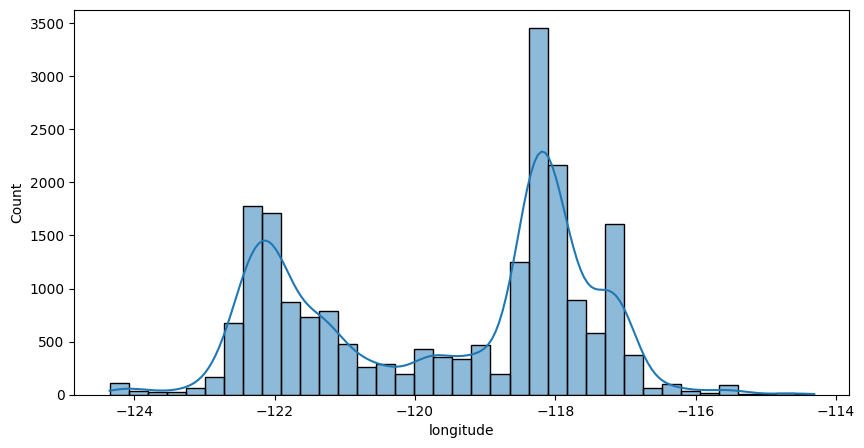

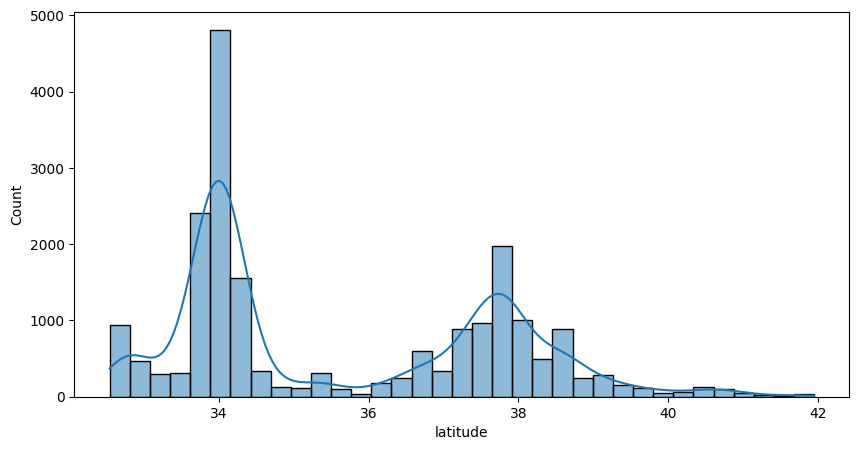

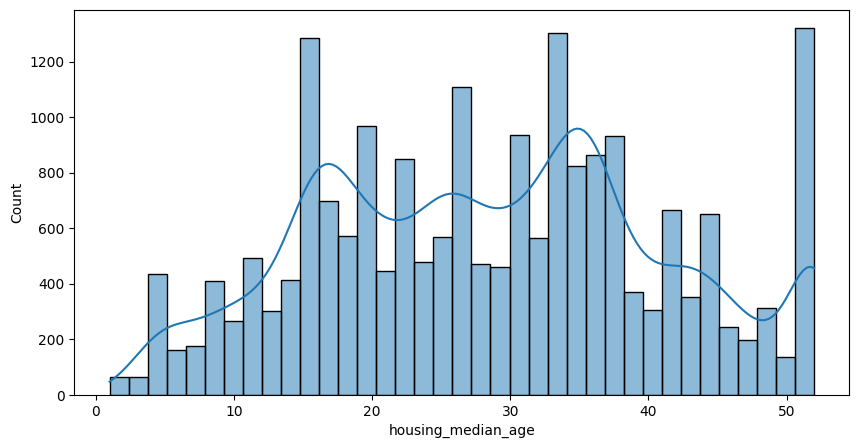

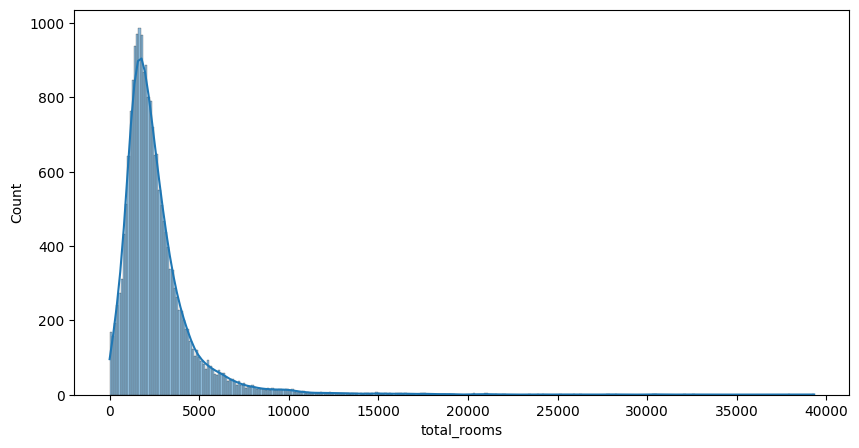

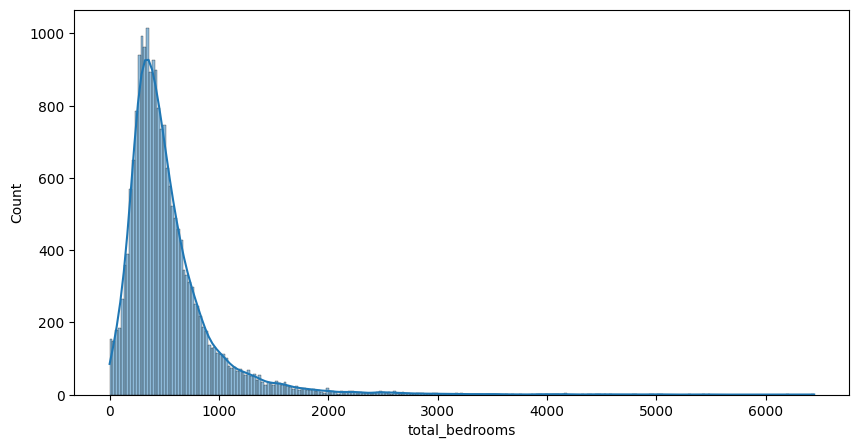

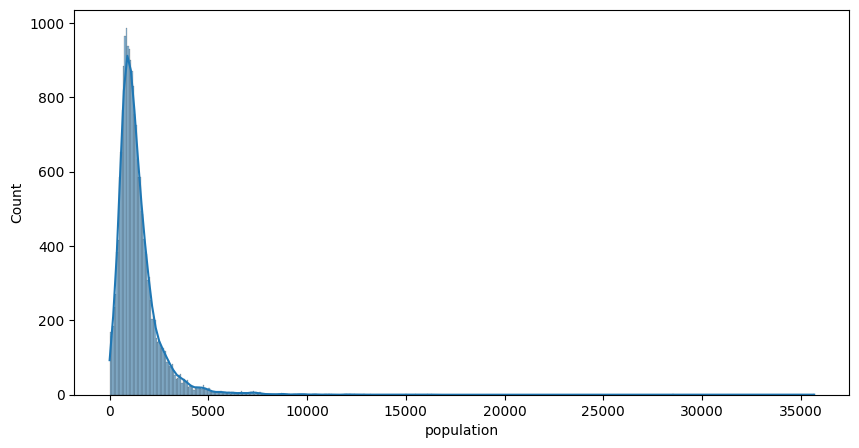

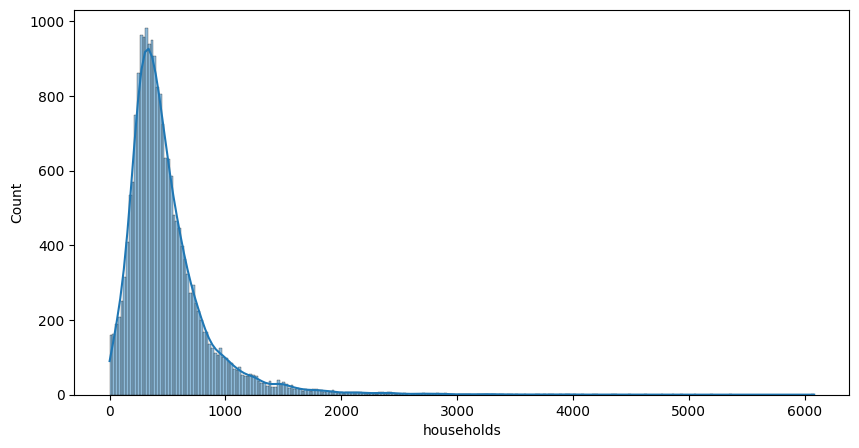

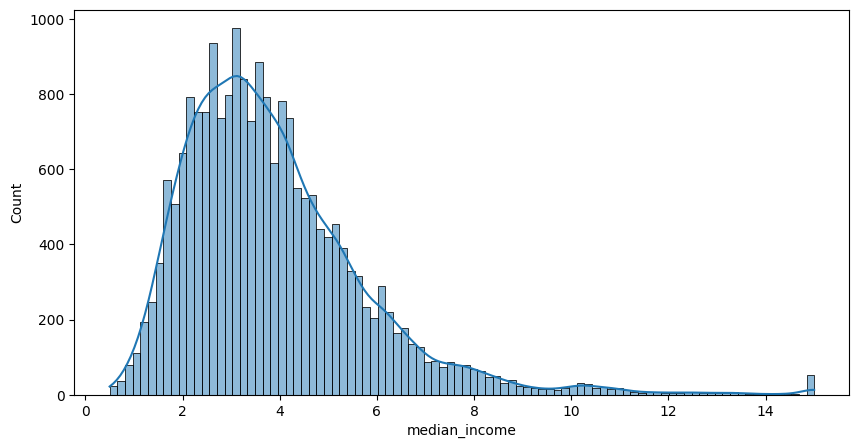

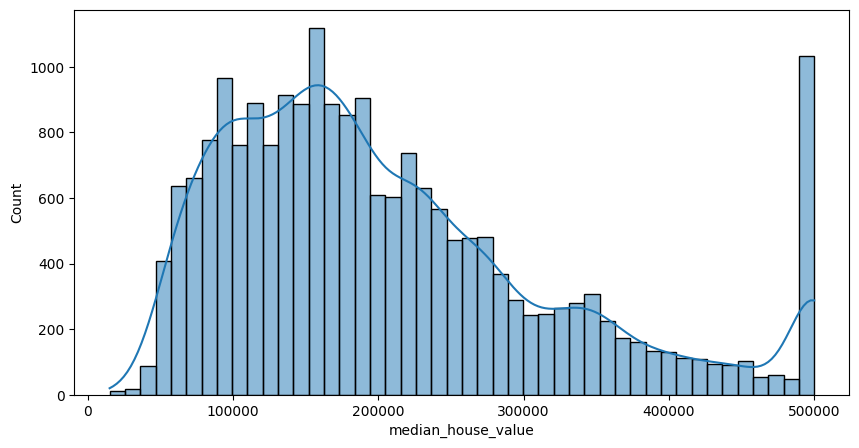

In [11]:
for col in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col], kde=True)
  plt.show()

# Insights

Right-skewed distribution  
Most houses fall in the lower price range, with values concentrated around $150,000. The distribution tapers off as prices increase.

Peak at $150,000  
This is the most common median house value in the dataset, suggesting affordability or clustering of housing prices around this level.

Artificial spike at $500,000  
The sharp jump at $500,000 indicates a capping effect in the dataset. This usually happens when data collection imposes a maximum threshold (e.g., housing values above $500,000 are recorded as $500,000). It’s important because it hides the true distribution of higher-value homes.

Long tail beyond $200,000  
While fewer houses exist in higher ranges, the tail shows diversity in housing markets, with some properties valued well above the median.

The dataset likely represents housing data from California (common in ML datasets like the California Housing dataset).

The cap at $500,000 could distort modeling results — for example, regression models may underestimate the true value of high-end houses.

The clustering around $150,000 suggests a large portion of middle-income housing stock, which could be useful for affordability studies or policy analysis.

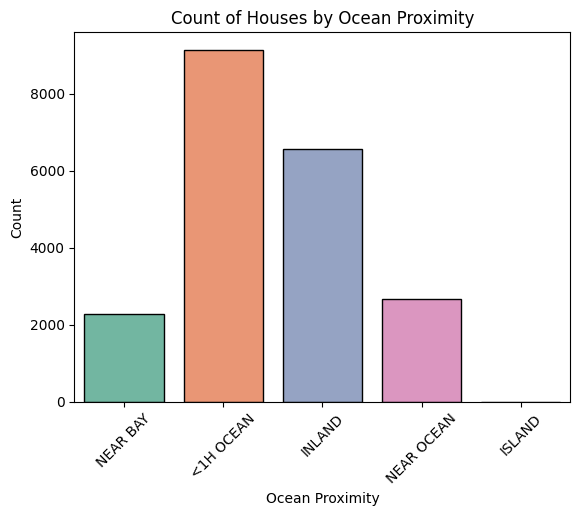

In [12]:
sns.countplot(x='ocean_proximity', data=df, palette='Set2', edgecolor='black')
plt.title('Count of Houses by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45) # rotate labels if they overlap
plt.show()

Most houses are in the <1H OCEAN category  
This means the majority of properties are located within one hour's drive of the ocean. It suggests strong clustering of housing near coastal areas, likely due to demand for accessibility and lifestyle benefits.

Second largest group is INLAND  
A significant portion of houses are far from the coast. This reflects affordability and availability of land in non-coastal regions.

Moderate counts for NEAR OCEAN and NEAR BAY  
These categories show smaller but notable clusters. They represent niche housing markets — either directly near the ocean or near bays, which may have unique economic or environmental appeal.

ISLAND category is negligible  
Almost no houses fall into this category, which makes sense given California's geography (few habitable islands compared to mainland coastal areas).

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

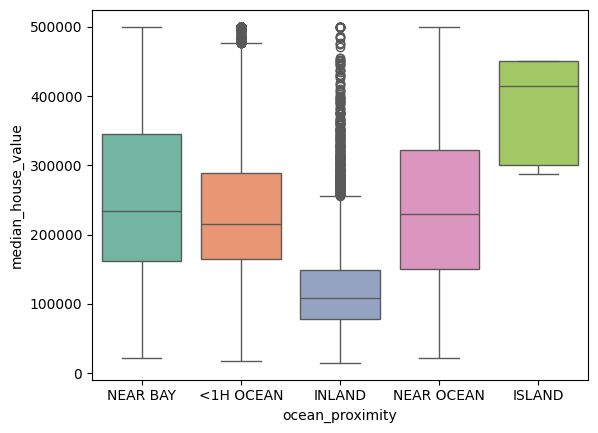

In [13]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')

ISLAND has the highest median house values  
Even though the count of houses in this category is very small (as seen in your earlier count plot), the few properties classified as “ISLAND” are consistently high-value. This suggests exclusivity and scarcity drive prices upward.

INLAND has the lowest median house values  
Houses far from the coast are generally cheaper. However, the box plot shows many outliers above the upper quartile, meaning some inland properties can still be quite expensive — likely due to urban centers or special locations.

NEAR BAY and NEAR OCEAN categories  
These show moderately high values compared to inland, but not as extreme as ISLAND. They represent desirable but more accessible coastal living.

<1H OCEAN category  
This group has a wide spread of house values, reflecting diversity in housing markets within one hour’s drive of the ocean. It’s a mix of affordable and premium properties.

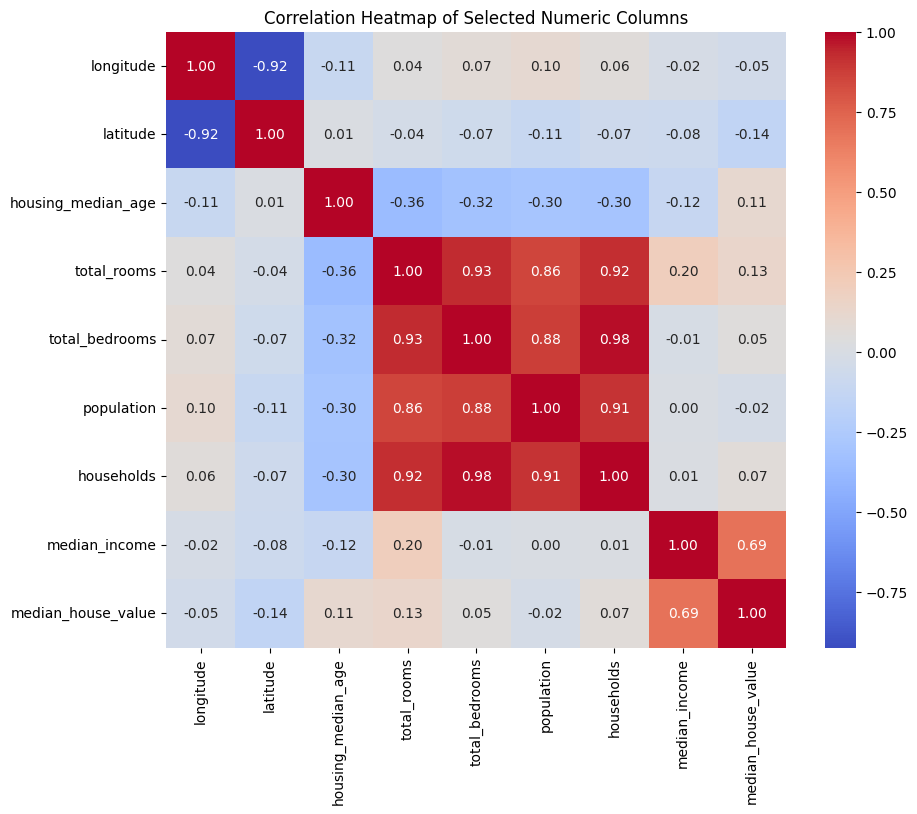

In [14]:
# Subset the DataFrame
corr_matrix = df[num_cols].corr()
# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numeric Columns')
plt.show()

Strongest Positive Correlation

total_rooms ↔ total_bedrooms (0.93)

total_bedrooms ↔ households (0.98)

population ↔ total_bedrooms (0.88) and ↔ households (0.91)
👉 These variables are highly collinear, meaning they carry overlapping information. For modeling, you may want to avoid including all of them together to reduce redundancy.

Strongest Negative Correlation

longitude ↔ latitude (-0.92)
👉 This is expected since locations in California (the dataset source) show a geographic trend: as longitude increases (eastward), latitude decreases (southward).

🏠 Housing Value Drivers
median_income ↔ median_house_value (0.69)
👉 Income is the most important predictor of house value. Higher incomes strongly align with higher house prices.

Other variables like total_rooms, households, and population show weak correlations with house value (0.13, 0.07, -0.02 respectively).
👉 This suggests that sheer size or density of housing units doesn’t explain value as much as income does.

📊 Age Factor
housing_median_age has:

Negative correlation with total_rooms, population, and households (~ -0.30).
👉 Older neighborhoods tend to have fewer rooms and smaller populations.

Slight positive correlation with median_house_value (0.11).
👉 Older areas may have slightly higher values, possibly due to established neighborhoods.

⚠️ Multicollinearity Warning
Variables like total_rooms, total_bedrooms, population, and households are too tightly correlated.
👉 In regression or ML models, this can cause instability. Consider dimensionality reduction (PCA) or feature engineering (e.g., ratios like rooms_per_household).

✨ Actionable Insights
Focus on median_income as the strongest predictor of house value.

Use engineered features (e.g., rooms_per_household, bedrooms_per_room) instead of raw counts to reduce redundancy.

Geographic variables (longitude, latitude) may capture location effects, but they are inversely related—so consider combining them into clusters or regions.

# Data Preprocessing And Feature enggerring

In [15]:
df_clean = df.copy()

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [17]:
df_clean['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [18]:
# one hot encoding
df_clean = pd.get_dummies(df_clean, columns=["ocean_proximity"], drop_first=True,dtype=int)

In [19]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [20]:
df_clean['median_income'].value_counts()

,count
median_income,
15.0001,49
3.1250,49
2.8750,46
2.6250,44
4.1250,44
...,...
3.6220,1
3.7238,1
4.6976,1


In [21]:
# Now, let's handle the missing values in the total_bedrooms column. We will impute them with the median value, as it is less sensitive to outliers than the mean.
median_total_bedrooms = df_clean['total_bedrooms'].median()
df_clean['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Verify that there are no more missing values in 'total_bedrooms'
display(df_clean.isnull().sum())

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_INLAND,0


In [22]:
# outleris handle
Q1 = df_clean["median_income"].quantile(0.25)
Q3 = df_clean["median_income"].quantile(0.75)
IQR = Q3 - Q1
outliers = df_clean[(df_clean["median_income"] < Q1 - 1.5*IQR) | (df_clean["median_income"] > Q3 + 1.5*IQR)]

In [23]:
df_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


# Model

In [24]:
X = df_clean.drop('median_house_value', axis=1)
y = df_clean['median_house_value']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_train)

LinearRegression()

In [28]:
y_pred = lin_reg.predict(X_test_scaled)

In [29]:
y_pred

array([ 54055.44889898, 124225.33893718, 255489.37949166, ...,
       439180.98341181, 120797.55240621, 183386.04993584])

In [30]:
y_test

,median_house_value
20046,47700
3024,45800
15663,500001
20484,218600
9814,278000
...,...
15362,263300
16623,266800
18086,500001
2144,72300


In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

RMSE: 70060.52184473518
MAE: 50670.73824097191
R² Score: 0.6254240620553606


In [32]:
n = X_test.shape[0] # number of samples
p = X_test.shape[1] # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R²:", adj_r2)

Adjusted R²: 0.6243317385425209


In [33]:
#---KNN Model----
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
y_pred_knn = knn.predict(X_test)

In [35]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
print("KNN:", rmse_knn)

KNN: 100691.31100557142


In [36]:
r2 = r2_score(y_test, y_pred_knn)
n = X_test.shape[0] # number of samples
p = X_test.shape[1] # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R²:", adj_r2)
print("Knn R²:", r2)

Adjusted R²: 0.22403566572186273
Knn R²: 0.22629192256977593


In [37]:
# ---- Random Forest (no scaling) ----
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred_rf = rf.predict(X_test)

In [39]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 49038.20933848149


In [40]:
r2 = r2_score(y_test, y_pred_rf)
n = X_test.shape[0] # number of samples
p = X_test.shape[1] # number of predictors (features)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Random Forest R²:", r2)
print("Random Forest Adjusted R²:", adj_r2)

Random Forest R²: 0.8164888965922015
Random Forest Adjusted R²: 0.8159537487815347


In [41]:
# ---- XGBoost (no scaling) ----
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
y_pred_xgb = xgb.predict(X_test)

In [43]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost RMSE: 47215.2897269518


In [44]:
r2 = r2_score(y_test, y_pred_xgb)
n = X_test.shape[0] # number of samples
p = X_test.shape[1] # number of predictors (features)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("XGBoost R²:", r2)
print("XGBoost Adjusted R²:", adj_r2)

XGBoost R²: 0.8298788070678711
XGBoost Adjusted R²: 0.8293827063837433


# Linear Regression → baseline (R² ~0.62, RMSE ~70k)

# KNN RMSE ~100k, R² ~0.22, Adjusted R² ~0.22 → weak fit.

# Random Forest → stronger (R² ~0.75–0.8, RMSE ~49k)

# XGBoost → best so far (R² ~0.83, RMSE ~47k)

# Hyper-Parameter Tunning

In [45]:
# Base model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],       # number of trees
    "max_depth": [3, 5, 7],                # depth of trees
    "learning_rate": [0.01, 0.05, 0.1],    # step size shrinkage
    "subsample": [0.8, 1.0],               # fraction of samples
    "colsample_bytree": [0.8, 1.0]         # fraction of features
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1            # use all cores
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)
n, p = X_test.shape
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Tuned XGBoost RMSE:", rmse)
print("Tuned XGBoost R²:", r2)
print("Tuned XGBoost Adjusted R²:", adj_r2)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Tuned XGBoost RMSE: 46303.5383529164
Tuned XGBoost R²: 0.8363856077194214
Tuned XGBoost Adjusted R²: 0.8359084819096116


In [47]:
import joblib
joblib.dump(best_xgb, 'xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')

['columns.pkl']